<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/PCA_on_USA_Arrests_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA on USA Arrests dataset 

---
This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas [dataset info](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests).


## Objectives

## 1.Librairies

In [1]:
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


## 2.Data

In [2]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/USArrests.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## 3.Exploratory Data Analysis

### 3.1 Dataset description

Dimension of dataset : (lines , columns)

In [ ]:
df.shape

(50, 4)

Names and data type of columns.


In [ ]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

Dataset information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Missing data.

In [ ]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### 3.2 Data description

In [ ]:
df.describe(include='all')

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### 3.3 Data distribution

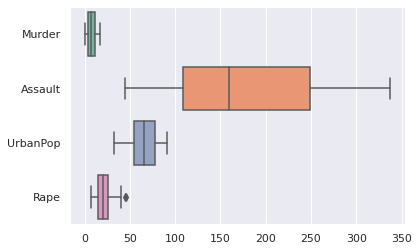

In [ ]:
sns.boxplot(data=df, orient="h", palette="Set2")

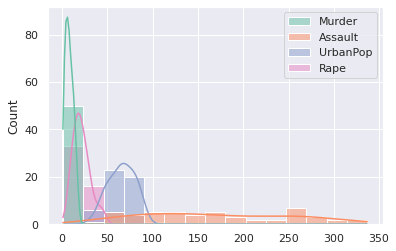

In [ ]:
sns.histplot(data=df, palette="Set2", kde=True)

### 3.4 Data correlation

In [ ]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


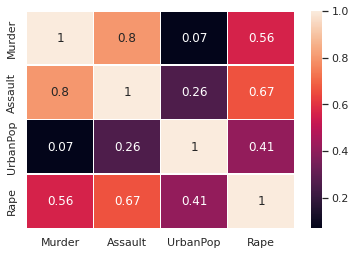

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

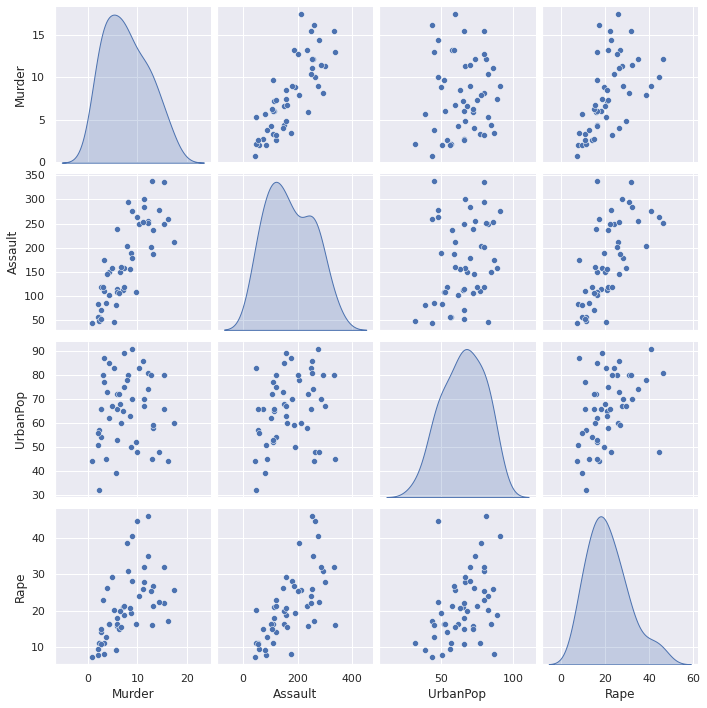

In [ ]:
sns.pairplot(data=df, palette="Set2", diag_kind='kde')

## 4.PCA
In the `decomposition` sub-module, we will import the `PCA()` function. The PCA' operation is similar to all the others in scikit-learn.

* We first create an object (named here `pca`) which will contain the result of the PCA. In the `PCA()` function, we can also indicate parameters such as the number of components to retain (`n_components`).
* Then, we adjust (`fit`) on data with the `fit()` function of the previously created object. In this function, we must therefore pass the data to be used (only quantitative variables).  
* If we want a standardized PCA, we have to standardize the data upstream, with for example the `scale()` function of the `preprocessing` sub-module (also imported here).  

**Of course, only quantitative variables should be used, with no missing data.**

### 4.1 Standardisation

In [3]:
df_scaled = scale(df)
df_scaled[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

Let's check the mean calculation, we expect all means to be closed to 0 after scaling.

In [4]:
np.mean(df_scaled, axis=0)

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

Let's check the standard deviation calculation, we expect all standard deviations to be closed to 1 after scaling.

In [5]:
np.std(df_scaled, axis=0)

array([1., 1., 1., 1.])

###4.2 PCA reduction
Here we create an object of the class `PCA` with fitting and data transformation.  
The result is a array with the 4 dimensions coordinates of all data points. 

In [14]:
pca = PCA()
data_pca = pca.fit_transform(df_scaled)

# Or alternatively
#pca.fit(df_scaled)
#pca.transform(df_scaled)

In [15]:
data_pca

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

The `pca` object now includes a number of objects and functions, such as :
* The components  (`components_`)
* The table of explained variances (`explained_variance_` - proportional to the eigenvalues) by each dimension.
* The ratio (proportion) of variance explained by dimension (`explained_variance_ratio_`).
* and others ... (see [PCA documention](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))

### 4.3 Explained variance
The following instruction returns the variance explained by each of the PCA' dimension.

In [16]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

But it's more understandable with the percentage of variance explained by each of the PCA' dimension.

In [17]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We may conclude that :
* First dimension explains 62% of variance, 
* Second dimension explains 25% of variance, 
* Third dimension explains 9% of variance,
* Fourth dimension explains 4% of variance.

Let's resume this information in a structured data frame.

In [18]:
df_variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Explained variance" : pca.explained_variance_,
        "% of explained variance" : np.round(pca.explained_variance_ratio_ * 100),
        "Cumulated % of explained variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
df_variance.head()

,Dimension,Explained variance,% of explained variance,Cumulated % of explained variance
0,Dim1,2.530859,62.0,62.0
1,Dim2,1.009964,25.0,87.0
2,Dim3,0.363840,9.0,96.0
3,Dim4,0.176969,4.0,100.0


### 4.4 Number of dimensions

And finally the choice of the number of dimensions may be done thanks to this plot, named **scree plot** (*graph des éboulis* in French). 

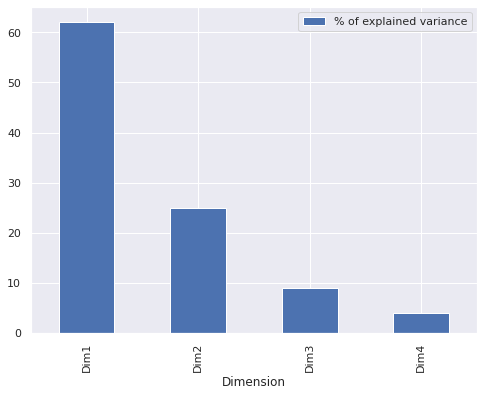

In [19]:
df_variance.plot.bar(x = "Dimension", y = "% of explained variance", figsize=(8, 6))

We may conclude that 2 dimensions is enough to explained most of the global variance :
* The first 2 dimensions explain 87%.
* The gain obtained with the third dimension is marginal, since we observe a gap between dimension 2 and 3.

### 4.5 Row analysis


Let's resume this information in a structured data frame for the first 2 dimensions.

In [20]:
df_pca = pd.DataFrame(
    {
      "Dim1" : data_pca[:,0], 
      "Dim2" : data_pca[:,1],
      "State" : df.index
    }
)
df_pca.head()

,Dim1,Dim2,State
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


Let's visualize the data points of the first factoriel map (i.e. dimensions 1 & 2).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


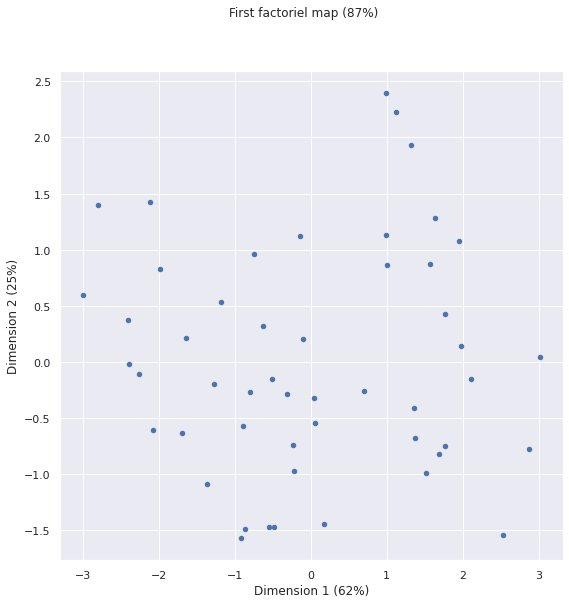

In [21]:
df_pca.plot.scatter("Dim1", "Dim2", figsize=(9, 9))
plt.xlabel("Dimension 1 (62%)")
plt.ylabel("Dimension 2 (25%)")
plt.suptitle("First factoriel map (87%)")
plt.show()

Let's visualize only the states for which the contribution is the most important.  
Contribution means they have a siginificant effect to the dimension creation.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


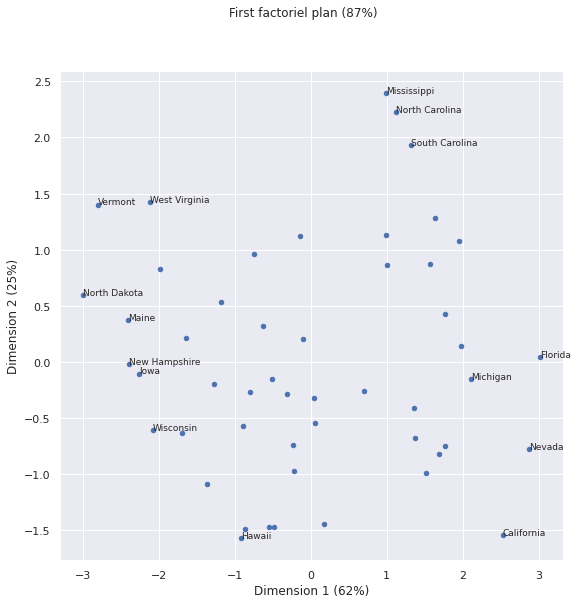

<Figure size 1008x720 with 0 Axes>

In [22]:
# subplots for plot annotation
fig, ax = plt.subplots()
df_pca.plot.scatter("Dim1", "Dim2", ax = ax, figsize=(9, 9)) # option ax for points text on the same plot

# loop on each state
for k in df_pca.iterrows():
    # annotation only if significant contribution on the 2 dimensions (tresholds empirically choosen)
    if (abs(k[1]['Dim1']) > 2) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["State"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (62%)")
plt.ylabel("Dimension 2 (25%)")
plt.suptitle("First factoriel plan (87%)")
plt.figure(figsize=(14, 10))
plt.show()

### 4.6 Feature analysis
PCA made in an exploratory context (and not of compression) necessary needs to describe the axes from the variables, in order to understand what they represent.  
For this, we should realize the circle of correlations.

In [23]:
n = df.shape[0] # nb data points
p = df.shape[1] # nb features

eigval = (n-1) / n * pca.explained_variance_ # eigen values
sqrt_eigval = np.sqrt(eigval) # square root of eigen values
corvar = np.zeros((p,p)) # empty matrix

# loop for matrix filling
for k in range(p): 
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

# dataframe
coordvar = pd.DataFrame({'id': df.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,Murder,0.843976,0.416035
1,Assault,0.918443,0.187021
2,UrbanPop,0.438117,-0.868328
3,Rape,0.855839,-0.166460


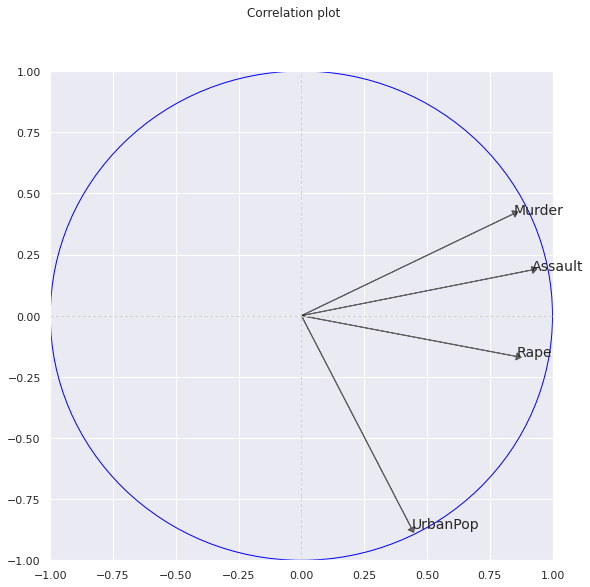

In [24]:
# First plot with fixed coordinates (-1 and +1)
fig, axes = plt.subplots(figsize = (9,9))
fig.suptitle("Correlation plot")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Axis
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)

# Names of features
for j in range(p):
    axes.text(x=coordvar["COR_1"][j], y=coordvar["COR_2"][j], s=coordvar["id"][j], fontsize=14)
    plt.arrow(0, 0, coordvar["COR_1"][j], coordvar["COR_2"][j], color = 'black', fc="k", ec="k", head_width=0.03, head_length=0.02, alpha = 0.6)

# Circle (0, 1)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()

### 4.7 PCA interpretation
From the last sections we may interprate the PCA' results as following :
* First dimension represents the global criminality.
* Second dimenion represents the state' urbanisation.
* The state of California has a high urban population and a high criminality level.
* At the opposite, the state of Vermont has a low urban population and a low criminality level.

## 5.Conclusions
* We have seen the use of principal component analysis for dimensionality reduction, for visualization and for feature selection.  
* PCA may be a good start in order to visualize the relationship between points, to understand the main variance in the data and to understand the intrinsic dimensionality.  
* Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

## 6.Ressources
* Python Data Science Handbook [In Depth: Principal Component Analysis](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb)
* FX Jollois - [Analyse de données sous Python](https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html)